

<h1 align="center">
    NSDC Data Science Projects
</h1>
  
<h2 align="center">
    Project: Customer Segmentation Analysis
</h2>

<h3 align="center">
    Name: Mahesh Kumar Gurumoorthi
</h3>


### **Please read before you begin your project**

**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive.

Please rename the file to "Customer Segmentation - Your Full Name." Once this project is completed, you will be prompted to share your file with the National Student Data Corps (NSDC) Project Leaders.

You can now start working on the project. :)


**Project Description:**

This project will introduce students to an array of skills as they strive to create an unsupervised machine learning model to divide customers into segments to optimize the significance of each customer. Customer segmentation is the process of grouping consumers according to characteristics that are shared by all of the customers in a cluster. We will also cover visualizations and how to deploy models in the real world.


Google Colab QuickStart:
- Google Colab is a Python Notebook environment built by Google that's free for all.
- Colab Notebooks are made up of cells; cells can be either *text* or *code* cells. You can click the +code or +text button at the top of the Notebook to create a new cell.
- Text cells use a format called [Markdown](https://www.markdownguide.org/getting-started/). Knowledge of Markdown is not required for this project. However, if you'd like to learn more, [check out this Cheatsheet!](https://www.markdownguide.org/cheat-sheet/)
- Python code is executed in *code* cells. When you want to run your code, hover your cursor over the square brackets in the top left corner of your code cell. You'll notice a play button pop up! (▶) Click the play button to run the code in that cell. Code cells run one at a time.
- The memory shared across your notebook is called the *Runtime*. You can think of a Runtime as a "code session" where everything you create and execute is temporarily stored.
- Runtimes will persist for a short period of time, so you are safe if you need to refresh the page, but Google will shutdown a Runtime after enough time has passed. Everything that you have printed out will remain within your Notebook even if the runtime is disconnected.

If this is your first time using Google Colab, we highly recommend reviewing the [NSDC's *Using Google Colab Guide*](https://nebigdatahub.org/wp-content/uploads/2023/04/NSDC-Data-Science-Projects-Introduction-Using-Google-Colab.pdf) before continuing. For a more comprehensive guide, see [Colab's *Welcome To Colaboratory* walkthrough.](https://colab.research.google.com/github/prites18/NoteNote/blob/master/Welcome_To_Colaboratory.ipynb)


---
---



<h3 align = "center">
    Milestone #1: Data Retrieval and Pre-Processing
</h3>

GOAL: The main goal of this milestone is to set up your environment, install the required packages, learn how to access data and do some basic data preparation tasks.

**Step 1:** Setting up libraries and installing packages

To install a library:
```python
 import <library> as <shortname>
```
We use a *short name* since it is easier to refer to the package to access functions and also to refer to subpackages within the library.


In [81]:
#TODO: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

---

**Step 2:** Let’s access our data. We will be using the Marketing Campaign dataset from Kaggle.


[The Marketing Campaign  dataset is available at this link](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign). It is better to use the link provided directly within the read_csv function.



We will use pandas to read the data from the csv file using the `read_csv` function. This function returns a pandas dataframe. We will store this dataframe in a variable called `df`.

In [106]:
# TODO: Read the data using pandas read_csv function
df = pd.read_csv('/Users/maheshg/Dropbox/Sample Datasets Kaggle/Customer Segment Analysis/marketing_campaign.csv', delimiter=';')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [108]:
df.describe

<bound method NDFrame.describe of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04  

In [109]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [110]:
df.shape

(2240, 29)

In [111]:
df.size

64960

In [112]:
df.describe

<bound method NDFrame.describe of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04  

---

**Step 3:** Let's prepare our data for analysis. Follow the steps below to review the first 5 rows of your dataset, display column names, and get other basic information about the dataset.

In [113]:
# TODO: Print the first 5 rows of the data using the head function of pandas.
df.head(n=5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [114]:
# TODO: Display all the column names.
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [115]:
# TODO: Print the dimensions of the dataset using the shape function.
df.shape

(2240, 29)

In [116]:
# TODO: Use info function to get basic information about the dataset.
df.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04    

In [117]:
# TODO: Describe the data using describe function of pandas.
df.describe

<bound method NDFrame.describe of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04  

In [118]:
# TODO: Check for missing values in the dataset.
df.isna()

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
0     False       False      False           False   False    False     False   
1     False       False      False           False   False    False     False   
2     False       False      False           False   False    False     False   
3     False       False      False           False   False    False     False   
4     False       False      False           False   False    False     False   
...     ...         ...        ...             ...     ...      ...       ...   
2235  False       False      False           False   False    False     False   
2236  False       False      False           False   False    False     False   
2237  False       False      False           False   False    False     False   
2238  False       False      False           False   False    False     False   
2239  False       False      False           False   False    False     False   

      Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0           False    False     False  ...              False         False   
1           False    False     False  ...              False         False   
2           False    False     False  ...              False         False   
3           False    False     False  ...              False         False   
4           False    False     False  ...              False         False   
...           ...      ...       ...  ...                ...           ...   
2235        False    False     False  ...              False         False   
2236        False    False     False  ...              False         False   
2237        False    False     False  ...              False         False   
2238        False    False     False  ...              False         False   
2239        False    False     False  ...              False         False   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0            False         False         False         False     False   
1            False         False         False         False     False   
2            False         False         False         False     False   
3            False         False         False         False     False   
4            False         False         False         False     False   
...            ...           ...           ...           ...       ...   
2235         False         False         False         False     False   
2236         False         False         False         False     False   
2237         False         False         False         False     False   
2238         False         False         False         False     False   
2239         False         False         False         False     False   

      Z_CostContact  Z_Revenue  Response  
0             False      False     False  
1             False      False     False  
2             False      False     False  
3             False      False     False  
4             False      False     False  
...             ...        ...       ...  
2235          False      False     False  
2236          False      False     False  
2237          False      False     False  
2238          False      False     False  
2239          False      False     False  

[2240 rows x 29 columns]

In [119]:
# TODO: Drop the missing values.
df.dropna(how='all')

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [120]:
# TODO: Check for duplicates.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [121]:
#TODO: Rename column names.
df.rename(columns={'Year_Birth':'Birth Year','Marital_Status':'Marital'})

ID  Birth Year   Education   Marital   Income  Kidhome  Teenhome  \
0      5524        1957  Graduation    Single  58138.0        0         0   
1      2174        1954  Graduation    Single  46344.0        1         1   
2      4141        1965  Graduation  Together  71613.0        0         0   
3      6182        1984  Graduation  Together  26646.0        1         0   
4      5324        1981         PhD   Married  58293.0        1         0   
...     ...         ...         ...       ...      ...      ...       ...   
2235  10870        1967  Graduation   Married  61223.0        0         1   
2236   4001        1946         PhD  Together  64014.0        2         1   
2237   7270        1981  Graduation  Divorced  56981.0        0         0   
2238   8235        1956      Master  Together  69245.0        0         1   
2239   9405        1954         PhD   Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0     2012-09-04       58       635  ...                  7             0   
1     2014-03-08       38        11  ...                  5             0   
2     2013-08-21       26       426  ...                  4             0   
3     2014-02-10       26        11  ...                  6             0   
4     2014-01-19       94       173  ...                  5             0   
...          ...      ...       ...  ...                ...           ...   
2235  2013-06-13       46       709  ...                  5             0   
2236  2014-06-10       56       406  ...                  7             0   
2237  2014-01-25       91       908  ...                  6             0   
2238  2014-01-24        8       428  ...                  3             0   
2239  2012-10-15       40        84  ...                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
0                 3         11         1  
1                 3         11         0  
2                 3         11         0  
3                 3         11         0  
4                 3         11         0  
...             ...        ...       ...  
2235              3         11         0  
2236              3         11         0  
2237              3         11         0  
2238              3         11         0  
2239              3         11         1  

[2240 rows x 29 columns]


---

---
---



<h3 align = "center">
    Milestone #2: Feature Engineering
</h3>

GOAL: The main goal of this milestone is to do some feature engineering and perform exploratory data analysis (EDA).

**Step 1:** The goal of this step is to perform feature engineering as required and drop the features that are irrelevant. To better understand feature engineering, [review this resource.](https://builtin.com/articles/feature-engineering) Then, fill in the blanks below.

In [122]:
# TODO: Perform feature engineering as required.
# Create a new column named 'Age'.
df['Age'] = 2022 - df['Year_Birth']

# TODO: Create a new column for all the accepted campaigns.
df['Accepted_Campaigns'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# TODO: Create a new column for all the items.
df['Total_Items'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# TODO: Create a new column for all the purchases.
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# TODO: Display the dataframe with the updated columns.
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58       635  ...             0             0         0   
1  2014-03-08       38        11  ...             0             0         0   
2  2013-08-21       26       426  ...             0             0         0   
3  2014-02-10       26        11  ...             0             0         0   
4  2014-01-19       94       173  ...             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age  Accepted_Campaigns  Total_Items  \
0              3         11         1   65                   0         1617   
1              3         11         0   68                   0           27   
2              3         11         0   57                   0          776   
3              3         11         0   38                   0           53   
4              3         11         0   41                   0          422   

   Total_Purchases  
0               25  
1                6  
2               21  
3                8  
4               19  

[5 rows x 33 columns]

In [124]:
 # TODO: Drop irrelevant features.
df_new = df.drop(['Dt_Customer', 'Education', 'Marital_Status', 'Year_Birth', 'ID'], axis = 1)

# TODO: Display the dataframe.
df_new.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  AcceptedCmp1  \
0              172                88            88  ...             0   
1                2                 1             6  ...             0   
2              111                21            42  ...             0   
3               10                 3             5  ...             0   
4               46                27            15  ...             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  \
0             0         0              3         11         1   65   
1             0         0              3         11         0   68   
2             0         0              3         11         0   57   
3             0         0              3         11         0   38   
4             0         0              3         11         0   41   

   Accepted_Campaigns  Total_Items  Total_Purchases  
0                   0         1617               25  
1                   0           27                6  
2                   0          776               21  
3                   0           53                8  
4                   0          422               19  

[5 rows x 28 columns]

---

**Step 2:** Now that we have dealt with outliers and done some feature engineering, the next step is to plot some distributions and check for outliers. To do so, [review this resource to best understand interquartile range](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/a/interquartile-range-review), as we will be using that statistic below. Then, fill in the blanks.

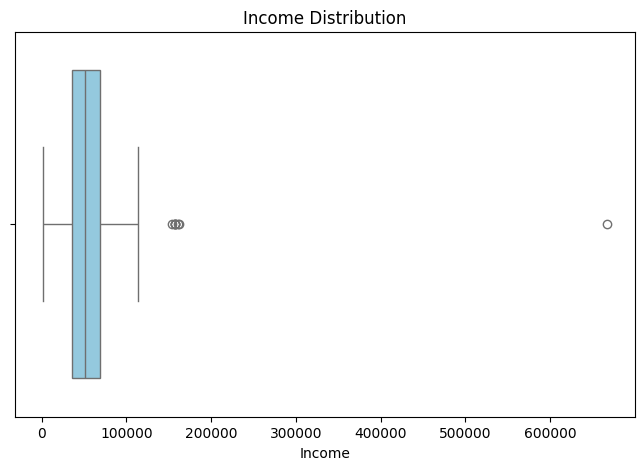

In [125]:
# TODO: Plot distributions for the relevant columns and check for outliers.
# Boxplot for `Income` distribution.
plt.figure(figsize = (8,5))
sns.boxplot(df, x = 'Income',  color = 'skyblue')
plt.title('Income Distribution');

In [126]:
# TODO: Calculate the Interquartile range (IQR) for the `Income` column.
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# TODO: Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# TODO: Print the number of outliers
print("Outliers in the Income column:", len(outliers))

Outliers in the Income column: 8


In [127]:
# TODO: Remove the outliers in the `Income` column.
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [128]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Accepted_Campaigns', 'Total_Items', 'Total_Purchases'],
      dtype='object')

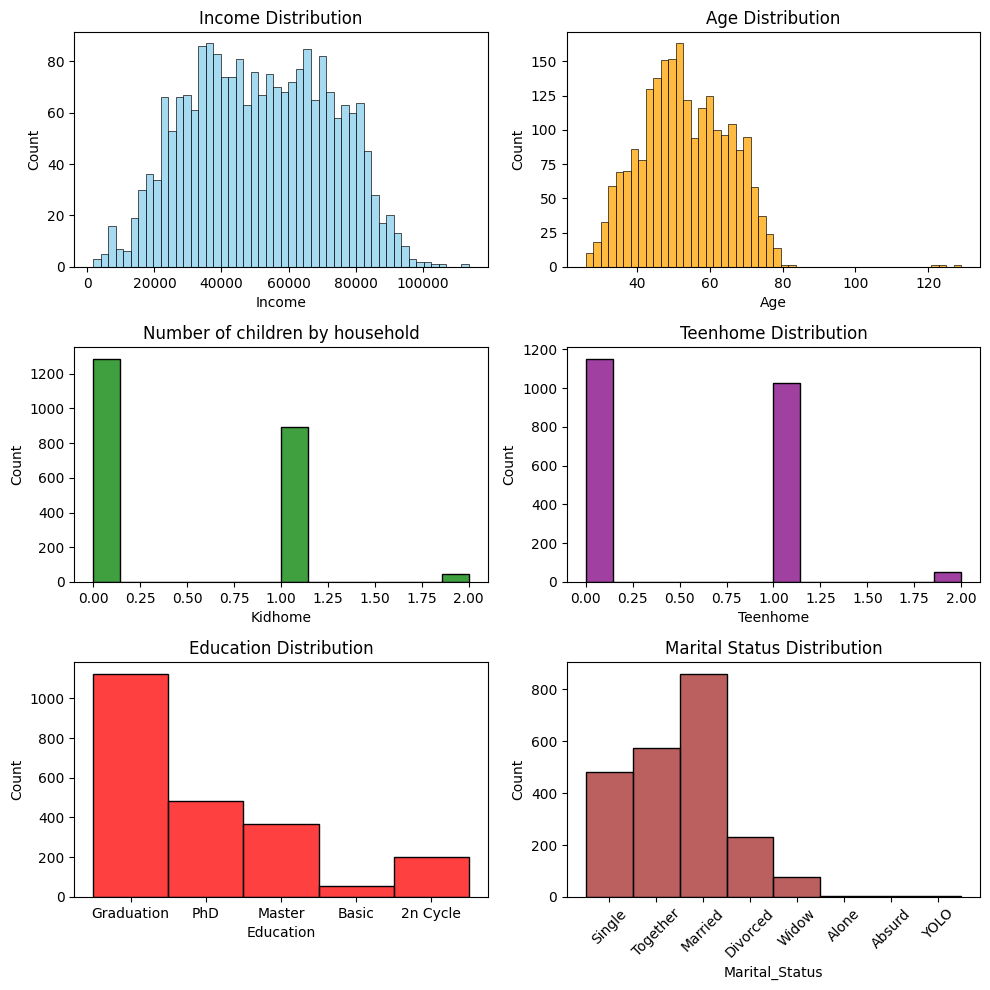

In [129]:
# TODO: Plot Histograms for the important columns.
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10))

# TODO: Histogram for `Income` distribution.
sns.histplot(df, x = 'Income', color = 'skyblue', bins = 50, ax = axes[0,0])
axes[0,0].set_title('Income Distribution')

# TODO: Histogram for `Age` distribution.
sns.histplot(df, x = 'Age', color = 'orange', bins = 50, ax = axes[0,1])
axes[0,1].set_title('Age Distribution')

# TODO: Histogram for `Kidhome` distribution.
sns.histplot(df, x = 'Kidhome', color = 'green', ax = axes[1,0])
axes[1,0].set_title('Number of children by household')

# TODO: Histogram for `Teenhome` distribution.
sns.histplot(df, x = 'Teenhome', color = 'purple', ax = axes[1,1])
axes[1,1].set_title('Teenhome Distribution')
 
# TODO: Histogram for `Education` distribution.
sns.histplot(df, x = 'Education', color ='red', ax = axes[2,0])
axes[2,0].set_title('Education Distribution')

# TODO: Histogram for `Marital_Status` distribution.
sns.histplot(df, x = 'Marital_Status', color = 'brown', ax = axes[2,1])
axes[2,1].set_title('Marital Status Distribution')
plt.xticks(rotation = 45)

plt.tight_layout();

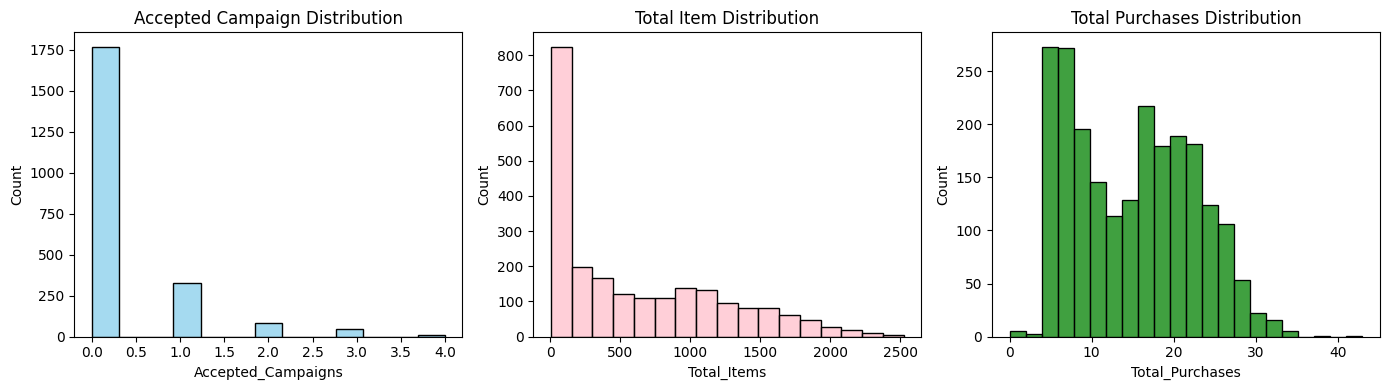

In [130]:
# TODO: Distributions for `Accepted_Campaigns`, `Total_Items`, and `Total_Purchases columns.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))

sns.histplot(df, x = 'Accepted_Campaigns', color = 'skyblue', ax = axes[0])
axes[0].set_title('Accepted Campaign Distribution')

sns.histplot(df, x = 'Total_Items', color = 'pink', ax = axes[1])
axes[1].set_title('Total Item Distribution')

sns.histplot(df, x = 'Total_Purchases', color = 'green', ax = axes[2])
axes[2].set_title('Total Purchases Distribution')
plt.tight_layout();

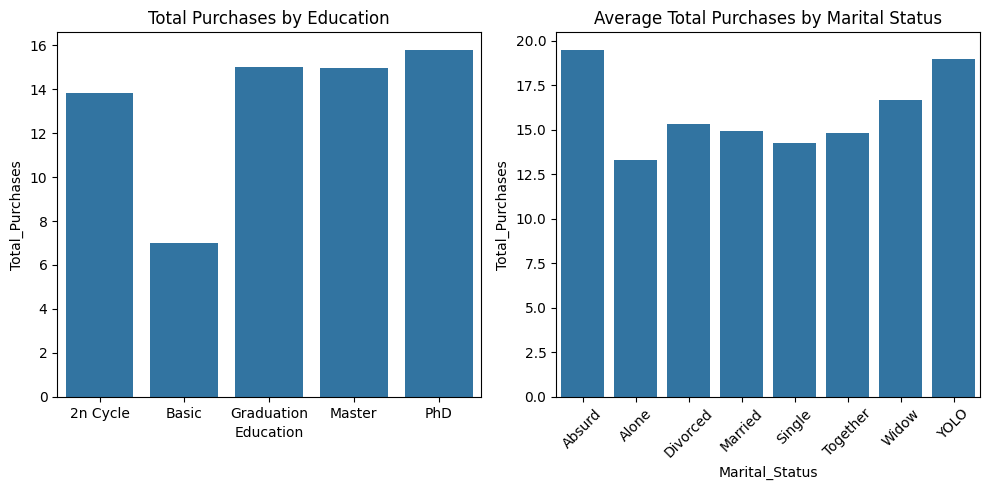

In [131]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

# TODO: Bar plot for `Total_Purchases` by `Education`.
df1 = df.groupby(['Education'])['Total_Purchases'].mean().reset_index()
sns.barplot(df1, x = 'Education', y = 'Total_Purchases', ax = axes[0])
axes[0].set_title('Total Purchases by Education')

# TODO: Bar plot for `Total_Purchases` by `Marital_Status`.
df2 = df.groupby(['Marital_Status'])['Total_Purchases'].mean().reset_index()
sns.barplot(df2, x = 'Marital_Status', y = 'Total_Purchases', ax = axes[1])
axes[1].set_title('Average Total Purchases by Marital Status')
plt.xticks(rotation = 45)

plt.tight_layout();

**TO DO:** List 3 observations you've made from the visualizations above.
>*  Filled in Missing values logically. 
>*  Used group by clause based on the use case Marital Status by Total Purchases and then reset the index value 
>*  Added a meaningful title for clear interpretation


---
---



<h3 align = "center">
    Milestone #3: K-Means Clustering and Principal Component Analysis
</h3>

GOAL: The main goal of this milestone is to perform K-means clustering and dimensionality reduction using principal component analysis(PCA).

**Step 1:** Now that we have prepared the data and performed exploratory data analysis (EDA), we will now begin with one-hot encoding to encode the categorical variables in the dataset, followed by data scaling. [Find a resource here to better understand one hot encoding, including examples!](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/a/interquartile-range-review) To review the StandardScaler function, [review this resource.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [137]:
df.dtypes

ID                           int64
Year_Birth                   int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Dt_Customer                 object
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Complain                     int64
Z_CostContact                int64
Z_Revenue                    int64
Response                     int64
Age                          int64
Accepted_Campaigns  

In [138]:
df = df.select_dtypes(include=['number'])

In [139]:
df = df.fillna(df.mean())

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))

In [143]:
df

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0    -0.020562   -0.983726  0.315791 -0.825420 -0.931339  0.307081  0.980281   
1    -1.052708   -1.233983 -0.256815  1.031775  0.905012 -0.383851 -0.872949   
2    -0.446669   -0.316372  0.970011 -0.825420 -0.931339 -0.798410  0.359568   
3     0.182170    1.268592 -1.213166  1.031775 -0.931339 -0.798410 -0.872949   
4    -0.082182    1.018334  0.323316  1.031775 -0.931339  1.550759 -0.391822   
...        ...         ...       ...       ...       ...       ...       ...   
2235  1.626559   -0.149534  0.465570 -0.825420  0.905012 -0.107478  1.200055   
2236 -0.489803   -1.901336  0.601075  2.888971  0.905012  0.237988  0.300169   
2237  0.517387    1.018334  0.259618 -0.825420 -0.931339  1.447119  1.791069   
2238  0.814707   -1.067145  0.855043 -0.825420  0.905012 -1.420249  0.365508   
2239  1.175188   -1.233983  0.059978  1.031775  0.905012 -0.314758 -0.656145   

      MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp1  \
0      1.547741         1.735476         2.457243  ...     -0.262613   
1     -0.637496        -0.726318        -0.651911  ...     -0.262613   
2      0.568152        -0.174694         1.341605  ...     -0.262613   
3     -0.562143        -0.662493        -0.505598  ...     -0.262613   
4      0.417446        -0.215724         0.152811  ...     -0.262613   
...         ...              ...              ...  ...           ...   
2235   0.417446         0.076045         0.079654  ...     -0.262613   
2236  -0.662614        -0.616905        -0.688489  ...      3.807887   
2237   0.543035         0.235605        -0.103237  ...     -0.262613   
2238   0.090917         0.221929         0.774642  ...     -0.262613   
2239  -0.587261        -0.475579        -0.651911  ...     -0.262613   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response       Age  \
0        -0.116722 -0.097458            0.0        0.0  2.383828  0.983726   
1        -0.116722 -0.097458            0.0        0.0 -0.419493  1.233983   
2        -0.116722 -0.097458            0.0        0.0 -0.419493  0.316372   
3        -0.116722 -0.097458            0.0        0.0 -0.419493 -1.268592   
4        -0.116722 -0.097458            0.0        0.0 -0.419493 -1.018334   
...            ...       ...            ...        ...       ...       ...   
2235     -0.116722 -0.097458            0.0        0.0 -0.419493  0.149534   
2236     -0.116722 -0.097458            0.0        0.0 -0.419493  1.901336   
2237     -0.116722 -0.097458            0.0        0.0 -0.419493 -1.018334   
2238     -0.116722 -0.097458            0.0        0.0 -0.419493  1.067145   
2239     -0.116722 -0.097458            0.0        0.0  2.383828  1.233983   

      Accepted_Campaigns  Total_Items  Total_Purchases  
0              -0.439975     1.682002         1.330482  
1              -0.439975    -0.962227        -1.162585  
2              -0.439975     0.283388         0.805626  
3              -0.439975    -0.918988        -0.900156  
4              -0.439975    -0.305328         0.543198  
...                  ...          ...              ...  
2235           -0.439975     1.223004         0.411984  
2236            1.032326    -0.268741         0.936840  
2237            1.032326     1.056700         0.543198  
2238           -0.439975     0.394811         1.068054  
2239           -0.439975    -0.721087        -0.506514  

[2232 rows x 30 columns]

In [144]:
# TODO: Perform data scaling using StandardScaler function.
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)

---


**Step 2:** After One-hot encoding and data scaling, we can now execute dimensionality reduction using principal component analysis (PCA). Here's a [resource from IBM that further explains PCA.](https://www.ibm.com/topics/principal-component-analysis)

In [145]:
# TODO: Initialize and fit the PCA model.
pca = PCA(n_components = 3)
pca.fit(df)
PCA_df = pd.DataFrame(pca.transform(df), columns=(["Group_1","Group_2", "Group_3"]))
PCA_df.describe().T

count          mean       std       min       25%       50%  \
Group_1  2232.0  1.305208e-16  2.945521 -4.873145 -2.735575 -0.668888   
Group_2  2232.0 -7.958588e-17  1.661883 -4.551177 -1.183199 -0.114540   
Group_3  2232.0  7.003557e-17  1.543268 -4.486681 -0.925437 -0.108379   

              75%       max  
Group_1  2.372751  9.093212  
Group_2  1.019327  8.555692  
Group_3  0.783725  7.699981

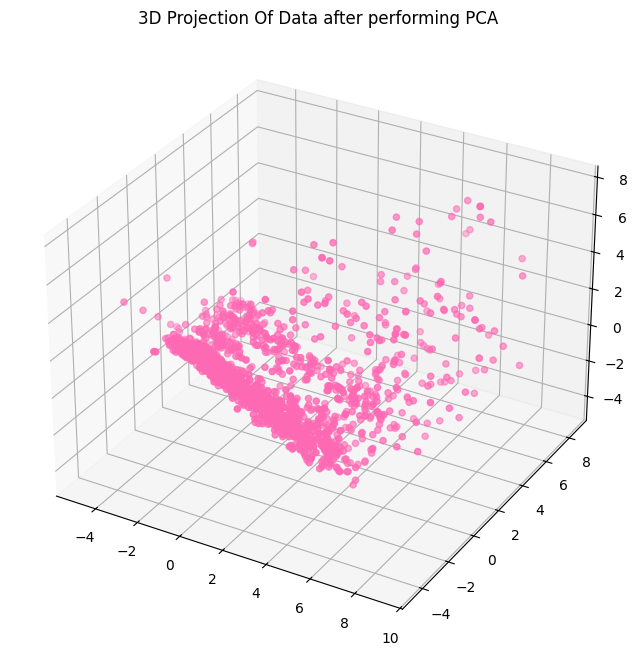

In [146]:
x = PCA_df["Group_1"]
y = PCA_df["Group_2"]
z = PCA_df["Group_3"]

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z, c = "hotpink")
ax.set_title("3D Projection Of Data after performing PCA")
plt.show()

---

**Step 3:** In this step, we will use the Elbow method to determine the optimal number of clusters and fit the K-Means model. [Here's an explanation of the Elbow method.](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)

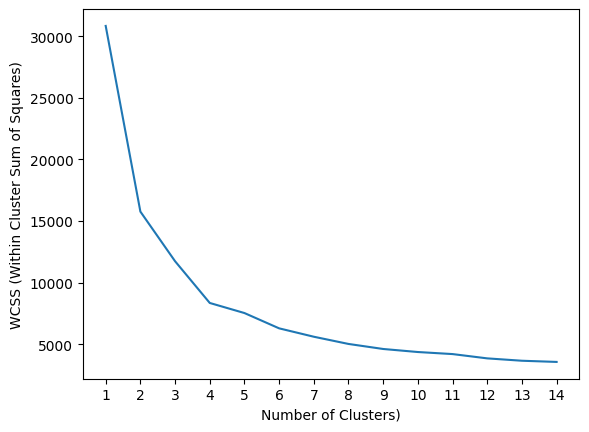

In [147]:
# TODO: Use Elbow method to determine the best number of clusters.
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,15), wcss)
plt.xticks(range(1,15))
plt.xlabel("Number of Clusters)")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.show()

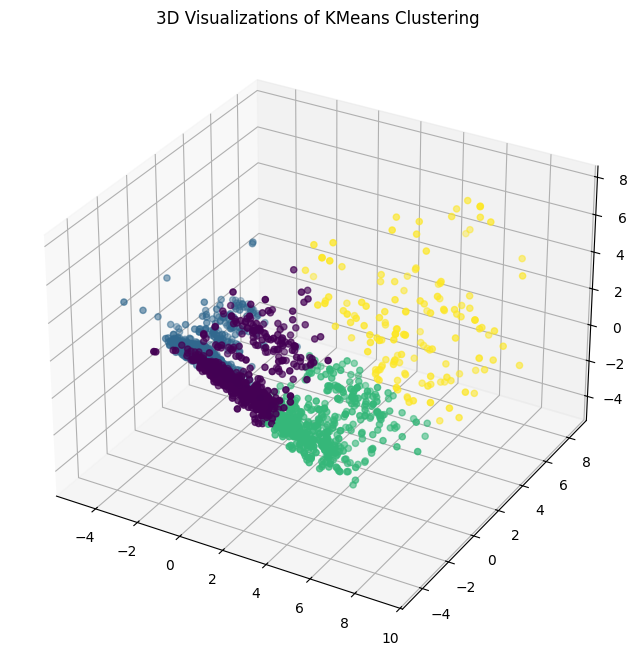

In [148]:
# TODO: Fit the K-Means model with the number of clusters and visualize it in 3D.
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(PCA_df)
df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d')
ax.scatter(x, y, z, c = df["Cluster"])
ax.set_title("3D Visualizations of KMeans Clustering")
plt.show()

---
---

<h3 align = 'center' >
Thank you for completing the project!
</h3>

Please submit all materials to the NSDC HQ team at nsdc@nebigdatahub.org in order to receive a virtual certificate of completion. Do reach out to us if you have any questions or concerns. We are here to help you learn and grow.